In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

# Ingesting data
con = sqlite3.connect("csgo.db")
csgo_df = pd.read_sql_query("SELECT * FROM round INNER JOIN game WHERE round.game_id = game.id", con, parse_dates=["time"])
players_df = pd.read_sql_query("SELECT * from players", con)
csgo_df['time'] = pd.to_datetime(csgo_df['time'], utc=True)

# Some Pandas visual display options to read the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [175]:
csgo_df['survivingCount'] =  csgo_df.survivingPlayers.apply(lambda x: len(x[1:-1].split(',')) if x != 'null' else 0)
csgo_df['longestKillWaitS'] = csgo_df['longestKillWait']/csgo_df['tickrate']
csgo_df['lastKillToEndS'] = csgo_df['lastKillToEnd']/csgo_df['tickrate']

In [176]:
csgo_df



,round_id,game_id,duration,losingTeamName,losingSide,startTick,endTick,endOfficialTick,survivingPlayers,losingTeamLeftoverMoney,equipmentSavedValue,killTicks,smokeTicks,molotovTicks,heTicks,longestKillWait,lastKillToEnd,round_no,heDamage,id,time,team_a,team_b,team_a_players,team_b_players,map,tickrate,survivingCount,longestKillWaitS,lastKillToEndS
0,1,1,106,BIG,3,895,14468,15108,[76561198118196092],11600,850,"[5773,7625,8816,9240,11420,11811,12862,13361,14754]","[5238,6177]",[4976],null,2180,1107,0,0,1,2022-05-16 14:30:47+00:00,BIG,Vitality,"[76561197961491680,76561198118196092,76561197980122997,76561198170631091,76561197997556936]","[76561197989744167,76561198004854956,76561197983956651,76561198113666193,76561198081528911]",de_mirage,128,1,17.031250,8.648438
1,2,1,59,BIG,3,17668,25251,25890,null,13900,0,"[22026,22099,22345,22602,22942,23282,24369,25251]","[18605,18694,18752,21382,21456,21729,23989,24386]","[21179,22178,24373]","[20321,21283,22665]",1087,0,1,32,1,2022-05-16 14:30:47+00:00,BIG,Vitality,"[76561197961491680,76561198118196092,76561197980122997,76561198170631091,76561197997556936]","[76561197989744167,76561198004854956,76561197983956651,76561198113666193,76561198081528911]",de_mirage,128,0,8.492188,0.000000
2,3,1,49,BIG,3,28450,34849,35489,null,28000,0,"[29989,31734,32150,32229,32794,33787,34849]","[29452,29634,32205]","[29654,30801]",[31687],1745,0,2,64,1,2022-05-16 14:30:47+00:00,BIG,Vitality,"[76561197961491680,76561198118196092,76561197980122997,76561198170631091,76561197997556936]","[76561197989744167,76561198004854956,76561197983956651,76561198113666193,76561198081528911]",de_mirage,128,0,13.632812,0.000000
3,4,1,114,BIG,3,38049,52763,53403,"[76561197980122997,76561197997556936]",18750,11150,"[41076,46280,46285,46291,47254,49147]","[38960,38963,40045,42096,42180,42452,42802,45406,47490]","[38791,39413,39970,46864,47922]","[39232,43680]",5204,3616,3,21,1,2022-05-16 14:30:47+00:00,BIG,Vitality,"[76561197961491680,76561198118196092,76561197980122997,76561198170631091,76561197997556936]","[76561197989744167,76561198004854956,76561197983956651,76561198113666193,76561198081528911]",de_mirage,128,2,40.656250,28.250000
4,5,1,72,Vitality,2,55963,65262,65901,null,23900,0,"[58135,58183,58436,59056,59204,59988,64708,65262]","[56946,57747,58132,58978,59143]","[56898,57776,57906,62557]","[57109,57881,60391]",4720,0,4,55,1,2022-05-16 14:30:47+00:00,BIG,Vitality,"[76561197961491680,76561198118196092,76561197980122997,76561198170631091,76561197997556936]","[76561197989744167,76561198004854956,76561197983956651,76561198113666193,76561198081528911]",de_mirage,128,0,36.875000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18918,18920,724,80,Virtus.pro,2,482130,492490,493130,null,33650,0,"[484089,484909,488096,488201,488284,488862,489085,489341,490695]","[483051,485410,485451]","[483426,484175,484324,485282,486153]","[483839,483847,484147,489085]",3187,1795,25,77,724,2021-10-30 13:38:21+00:00,Virtus.pro,Team Vitality,"[76561198036125584,76561197995817501,76561198173201923,76561198127236290,76561198134401925]","[76561198113666193,76561198081528911,76561197989744167,76561198006920295,76561198005967969]",de_inferno,128,0,24.898438,14.023438
18919,18921,724,115,Virtus.pro,2,495690,510410,511050,[76561198036125584],21000,6950,"[502103,503742,503815,504428,504735,509366]","[496525,498713,501830,503475,503768,503841,503989]","[496773,497930,498254,498647,502575,502954,503685,503974]","[497405,498527,499001,501607,502390,503865]",4631,1044,26,71,724,2021-10-30 13:38:21+00:00,Virtus.pro,Team Vitality,"[76561198036125584,76561197995817501,76561198173201923,76561198127236290,76561198134401925]","[76561198113666193,76561198081528911,76561197989744167,76561198006920295,76561198005967969]",de_inferno,128,1,36.179688,8.156250
18920,18922,724,115,Virtus.pro,2,513610,528330,528970,null,15500,0,"[518273,518523,523611,524248,524726,525436,528801]","[514473,519310,

Create some averages of the data. For numerical values, we can immediately plot them.

In [177]:
yearly_average = csgo_df.resample("Y", on="time")
yearly_average.mean().dropna()
;

/tmp/ipykernel_1335/1524761603.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_average.mean().dropna()


''

In [178]:
monthly_average = csgo_df.resample("M", on="time")
monthly_average.mean().dropna()
;

/tmp/ipykernel_1335/330764374.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_average.mean().dropna()


''

The average duration of CS:GO rounds. As you can see, a clear upwards trend.

/tmp/ipykernel_1335/1175145296.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  duration_plot = monthly_average[["time", "duration"]].mean().dropna()


<Axes: xlabel='time'>

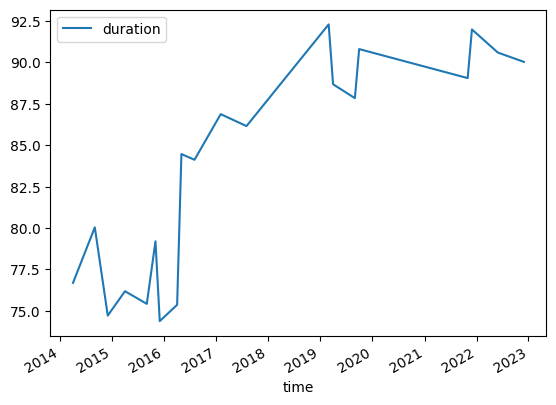

In [179]:
duration_plot = monthly_average[["time", "duration"]].mean().dropna()
duration_plot.plot()

/tmp/ipykernel_1335/683167702.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  survivingp_plot = monthly_average[["time", "survivingCount"]].mean().dropna()


<Axes: xlabel='time'>

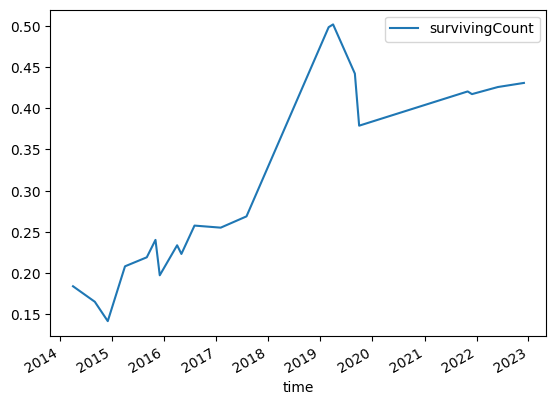

In [180]:
survivingp_plot = monthly_average[["time", "survivingCount"]].mean().dropna()
survivingp_plot.plot()

/tmp/ipykernel_1335/3828588760.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_average[['time', 'heDamage']].mean().dropna().plot()


<Axes: xlabel='time'>

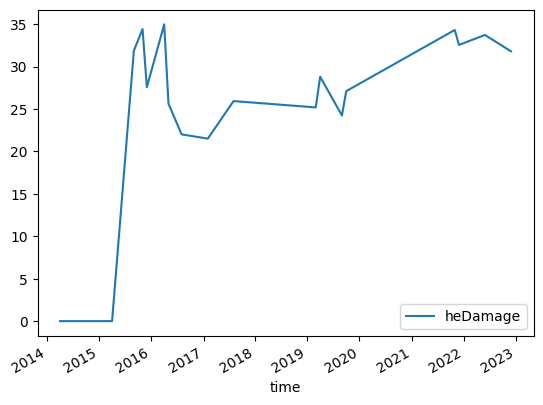

In [181]:
monthly_average[['time', 'heDamage']].mean().dropna().plot()

/tmp/ipykernel_1335/538616652.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  longestkill_plot = monthly_average[["time", "longestKillWaitS"]].mean().dropna()


<Axes: xlabel='time'>

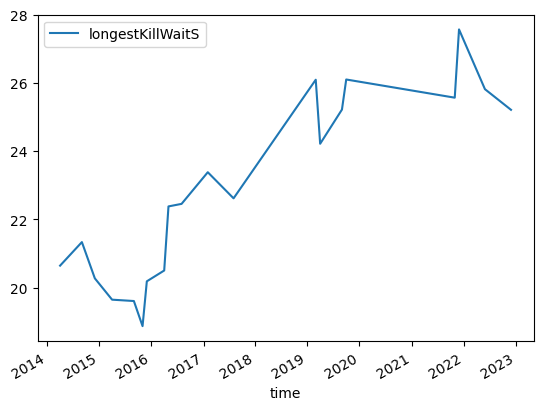

In [182]:
longestkill_plot = monthly_average[["time", "longestKillWaitS"]].mean().dropna()
longestkill_plot.plot()

/tmp/ipykernel_1335/685273263.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_average[['time', 'lastKillToEnd']].mean().dropna().plot()


<Axes: xlabel='time'>

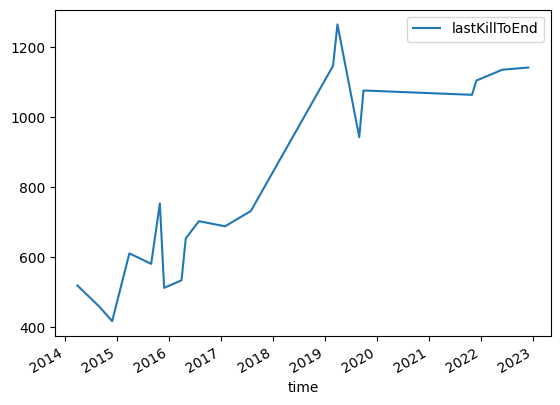

In [183]:
monthly_average[['time', 'lastKillToEnd']].mean().dropna().plot()

In [184]:
csgo_df["team_a_players_str"] = csgo_df.team_a_players.apply(lambda x: str(sorted(x[1:-1].split(','))))
csgo_df["team_b_players_str"] = csgo_df.team_b_players.apply(lambda x: str(sorted(x[1:-1].split(','))))
csgo_df["team_a_players"] = csgo_df.team_a_players.apply(lambda x: sorted(map(int, x[1:-1].split(','))))
csgo_df["team_b_players"] = csgo_df.team_b_players.apply(lambda x: sorted(map(int, x[1:-1].split(','))))
csgo_df["losingPlayers"] = np.where(csgo_df["losingTeamName"] == csgo_df["team_a"],  csgo_df["team_a_players"], csgo_df["team_b_players"])
csgo_df["losingPlayers_str"] = np.where(csgo_df["losingTeamName"] == csgo_df["team_a"],  csgo_df["team_a_players_str"], csgo_df["team_b_players_str"])

In [185]:
csgo_df.map.explode().value_counts()

de_mirage      3148
de_inferno     3129
de_dust2       2533
de_overpass    2200
de_nuke        1878
de_cbble       1649
de_train       1546
de_cache       1267
de_vertigo      871
de_ancient      702
Name: map, dtype: int64

In [186]:
survivingRounds = csgo_df.loc[csgo_df["survivingCount"] > 0]
survivingRounds
;

''

This should be accurate in calculating the teams that save the most. 

In [187]:
survivingRounds.losingPlayers.value_counts()

[76561197960499780, 76561197960725934, 76561197973845818, 76561197979126082, 76561197982141573]    113
[76561197996678278, 76561198004115516, 76561198022365638, 76561198064864198, 76561198160709585]     82
[76561197965809411, 76561197977105184, 76561197985097994, 76561198002708642, 76561198072321716]     77
[76561197995817501, 76561198036125584, 76561198127236290, 76561198134401925, 76561198173201923]     74
[76561197969684910, 76561197988627193, 76561197991348083, 76561198031554200, 76561198031651584]     72
                                                                                                  ... 
[76561197960301489, 76561197972003061, 76561197974587647, 76561198006920295, 76561198014251501]      1
[76561197961694928, 76561197963561698, 76561197965743043, 76561197967342827, 76561197987385769]      1
[76561197966075661, 76561197998606698, 76561198006466707, 76561198012944495, 76561198106907258]      1
[76561197960429732, 76561197961021014, 76561197964781654, 765611979813414

This is not a list of the most saved players - it is a list of players on teams that save the most. dupreeh might not have saved 235 times, but the teams he's been on have.

I would say that Jame and Qikert's position is quite notable. 

In [188]:
survivingRounds.losingPlayers.explode().value_counts().to_frame().reset_index().rename(columns={"index":"SteamID64", "losingPlayers": "roundsSaved"}).merge(players_df)[['name', 'roundsSaved']].groupby('roundsSaved').agg(list)

,name
roundsSaved,
1,"[stonde, xartE, KHRN, disturbed, HUNDEN, natu, AcilioN, racno-.`SGMF.<..>, cent #ALIENWARE, blackpoisoN #RAZER, Detrony #INTEL, deviaNt #COREX]"
2,"[desi, WOLF > astaRRRRR, WOLF > R i X, James, WOLF > RiTz, WOLF > Mithil:D, WOLF > Ace, oSee]"
3,"[yam, ub1que, zEVES, Polly * XTRFY, steel * ADATA, ptr]"
4,[THREAT]
5,"[suNny, HS, pita, koosta, DEVIL, innocent, [R]eason LOMME * SteelSeries, [R]eason EXR * SteelSeries, zehN]"
...,...
200,[s1mple]
212,[device]
215,"[Jame, Qikert, Zeus]"


This needs to be a SteamID64 like the above to be sure, but we can have a bit of an initial look here.

Again, jesus Jame.

In [189]:
csgo_df["survivingPlayers"] = csgo_df.survivingPlayers.apply(lambda x: sorted(map(int, x[1:-1].split(','))) if x != 'null' else None)

In [190]:
t = csgo_df.survivingPlayers.explode().value_counts().to_frame().reset_index(names="playerName").rename(columns={"playerName":"SteamID64", "survivingPlayers": "roundsSurvived"}).merge(players_df)
t

,SteamID64,roundsSurvived,name,apps
0,76561198036125584,121,Jame,47
1,76561198004854956,94,dupreeh,111
2,76561198034202275,90,s1mple,75
3,76561197987713664,76,device,109
4,76561197972331023,75,GuardiaN,77
...,...,...,...,...
300,76561197980539257,1,DavCost,7
301,76561197986829261,1,innocent,6
302,76561197976574229,1,zehN,3
303,76561197987053545,1,ub1que,2


In [191]:
t[['name', 'roundsSurvived']].groupby('roundsSurvived').agg(list)

,name
roundsSurvived,
1,"[HaRtsSsSsSs * ZOWIE GEAR, cent #ALIENWARE, AcilioN, Professor_Chaos, [R]eason EXR * SteelSeries, jR, Golden, zEVES, kNgV-, rallen, xartE, yam, DavCost, innocent, zehN, ub1que, hooch]"
2,"[rigoN, STYKO, WOLF > RiTz, steel * ADATA, Furlan, SPUNJ MSi, Hyper, Havoc[K] MSi, GruBy, suNny, zqkS, USTILO, koosta, AZK * ASRock, iBP anger, krystaLAW *Platincasino, Troubley * WorldofCDKeys.com, smF, zonic, fel1x *Platincasino, EPSILON Sf * GAMDIAS, keshandr, oskar, THREAT, abE, DEVIL]"
3,"[SnypeR, Grim, pyth, SIXER, HS, LDLC.com KQLY Cooler Master, swag * Intel, SENER1, spaze, James, Zero, emagine, pita, svyat]"
4,"[doto, lauNX, mezii, DaZeD Netcodeguides.com, arya, CW Nico * Komplett, LEGIJA, LDLC.com Uzzziii Cooler Master, sinnopsyy, FNS, speed4k, mir, Lucky, kinqie, fR11$HAAA]"
5,"[Staehr, Cloud9 CS seM <ALIENware>, juanflatroo, XANTARES, cype * Gunnar Optics, Devilwalk.teg * Fragnet, faveN, HooXi, maden, disco doplan, peet, zews]"
...,...
75,[GuardiaN]
76,[device]
90,[s1mple]


In [192]:
csgo_df['heTicks'] = csgo_df.heTicks.apply(lambda x: sorted(map(int, x[1:-1].split(','))) if x != "null" else [])
csgo_df['heTicksRelative'] = csgo_df.apply(lambda x: [y-x.startTick for y in x.heTicks ], axis=1)


<Axes: xlabel='time'>

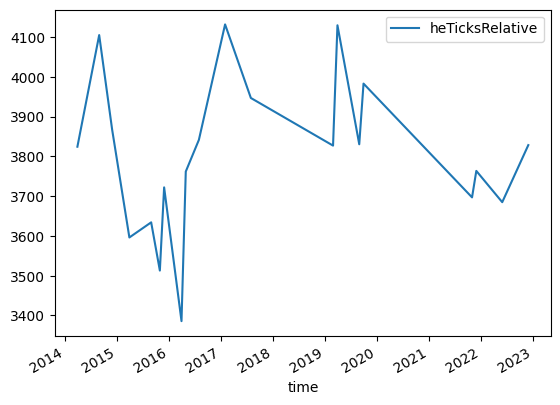

In [193]:
csgo_df[['time', 'heTicksRelative']].explode('heTicksRelative').resample("M", on="time").mean().dropna().plot()